In [1]:
import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__)
print(tf.keras.__version__)

2.3.0
2.4.0


In [4]:
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
layers.Dense(32, activation='sigmoid')
layers.Dense(32, activation=tf.sigmoid)
layers.Dense(32, kernel_initializer='orthogonal')
# kernel_initializer 和 bias_initializer：创建层权重（核和偏差）的初始化方案
layers.Dense(32, kernel_initializer=tf.keras.initializers.glorot_normal) 
# kernel_regularizer 和 bias_regularizer：应用层权重（核和偏差）的正则化方案，例如 L1 或 L2 正则化
layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.01))
layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l1(0.01))

In [8]:
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=[tf.keras.metrics.categorical_accuracy]) # 设置训练流程

In [21]:
import numpy as np
# 输入numpy数据并训练
train_x = np.random.random((1000, 72))
train_y = np.random.random((1000, 10))
val_x = np.random.random((200, 72))
val_y = np.random.random((200, 10))
model.fit(train_x, train_y, epochs=5, batch_size=100,
          validation_data=(val_x, val_y))

In [13]:
test_x = np.random.random([1000,72])
test_y = np.random.random([1000,10])
model.evaluate(test_x,test_y,batch_size=32)

32/32 [==============================] - 0s 592us/step - loss: 42.6099 - categorical_accuracy: 0.0890


[42.60990905761719, 0.08900000154972076]

In [20]:
result = model.predict(test_x,batch_size=32)
print(result)

In [19]:
# 使用keras函数式API可构建复杂的模型
input_x = tf.keras.Input(shape=(72,))
hidden1=layers.Dense(32,activation = 'relu')(input_x)
hidden2=layers.Dense(16,activation = 'relu')(hidden1)
pred =layers.Dense(10,activation = 'softmax')(hidden2)
model = tf.keras.Model(inputs = input_x,outputs=pred)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy'])
model.fit(train_x,train_y,batch_size=32,epochs=5)

In [32]:
# 模型子类化
class Mymodel(tf.keras.Model):
    def __init__(self,num_classes=10):
        super(Mymodel,self).__init__(name='my_model')
        self.num_classes=num_classes
        self.layer1 = layers.Dense(32,activation='relu')
        self.layer2 = layers.Dense(num_classes,activation='softmax')
    def call(self,inputs):
        h1 = self.layer1(inputs)
        out = self.layer2(h1)
        return out
    def compute_output_shape(self,input_shape):
        shape = tf.TensorShape(input_shape).as_list()
        shape[-1] = self.num_classes
        return tf.Tensorshape(shape)
model = Mymodel(num_classes=10)
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy'])
model.fit(train_x,train_y,batch_size=16,epochs=5)

Epoch 1/5
63/63 [==============================] - 0s 436us/step - loss: 16.0930 - accuracy: 0.1110
Epoch 2/5
63/63 [==============================] - 0s 412us/step - loss: 24.6067 - accuracy: 0.1070
Epoch 3/5
63/63 [==============================] - 0s 396us/step - loss: 32.8428 - accuracy: 0.1050
Epoch 4/5
63/63 [==============================] - 0s 397us/step - loss: 40.0320 - accuracy: 0.1110
Epoch 5/5
63/63 [==============================] - 0s 396us/step - loss: 45.8224 - accuracy: 0.1160


In [29]:
# 自定义层
class MyLayer(layers.Layer):
    def __int__(self,output_dim,**kwargs):
        self.output_dim=output_dim
        super(MyLayer,self).__init__(**kwargs)
    def build(self,input_shape):
        shape = tf.TensorShape((input_shape[1],self.output_dim))
        self.kernel = self.add_weight(name='kernel1',shape=shape,
                                     initializer='uniform',trainable=Ture)
        super(MyLayer,self).build(input_shape)
    def call(self,inputs):
        return tf.matul(inputs,self.kernel)
    def compute_output_shape(self, input_shape):
        shape = tf.TensorShape(input_shape).as_list()
        shape[-1] = self.output_dim
        return tf.TensorShape(shape)
    def get_config(self):
        base_config = super(MyLayer, self).get_config()
        base_config['output_dim'] = self.output_dim
        return base_config
    @classmethod
    def from_config(cls, config):
        return cls(**config)
model = tf.keras.Sequential([MyLayer(10),layers.Activation('softmax')])
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
             loss=tf.keras.losses.categorical_crossentropy,
             metrics=['accuracy'])
# model.fit(train_x, train_y, batch_size=16, epochs=5)

In [28]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler  # 数据预处理中的缩放模块
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline
# %matplotlib inline这一句是IPython的魔法函数，可以在IPython编译器里直接使用，作用是内嵌画图，省略掉plt.show()这一步，直接显示图像。

In [13]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names) # 构建df
df.drop(['sepal length (cm)','sepal width (cm)'],axis = 'columns',inplace= True)  # 只取两个特征，故把另外两个特征drop掉
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [43]:
# 数据归一化处理 数据的取值范围不同会影响聚类的效果
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])  # 计算用于以后缩放的最大值和最小值
df['petal length (cm)']=scaler.transform(df[['petal length (cm)']]) # 根据ferture_range缩放x的特征
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)']=scaler.transform(df[['petal width (cm)']]) # 根据ferture_range缩放x的特征

In [44]:
# 拟合+预测
km = KMeans(n_clusters=3)  # 设定超参数聚类数为3
y_predicted = km.fit_predict(df)  # 拟合＋预测
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,2
1,0.067797,0.041667,2
2,0.050847,0.041667,2
3,0.084746,0.041667,2
4,0.067797,0.041667,2


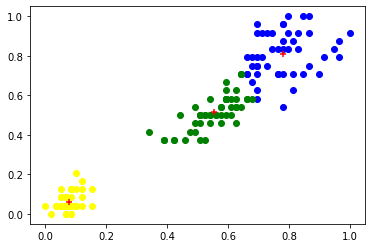

In [46]:
# 可视化聚类效果
df1 = df[df.cluster==0]  # 过滤出簇0
df2 = df[df.cluster==1]  # 过滤出簇1
df3 = df[df.cluster==2]  # 过滤出簇2
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'blue')  # 画簇0的散点图
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'green')  # 画簇1的散点图
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color = 'yellow')  # 画簇2的散点图
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'red',marker='+',label='centroid') # 画每个簇的中心

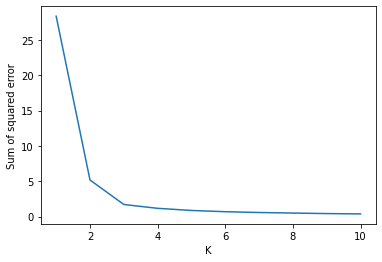

In [47]:
# 比较不同簇的均方误差
distance = []
for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    distance.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1,11),distance)
# 一般在肘部K值最佳

In [78]:
#导入糖尿病数据
import numpy as np
from sklearn.datasets import load_diabetes
data = load_diabetes()
x = data.data
y = data.target
print(x[:5])
print(y[:5])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]
[151.  75. 141. 206. 135.]


KMeans(n_clusters=2)
[0 1 0 0 1 1 1 0 0 1]
[[ 0.02793062 -0.09260116]
 [-0.13468605  0.06526341]
 [ 0.01294474 -0.07776417]
 [ 0.00234544  0.01818194]]
KMeans(n_clusters=3)
KMeans(n_clusters=4)
KMeans(n_clusters=5)


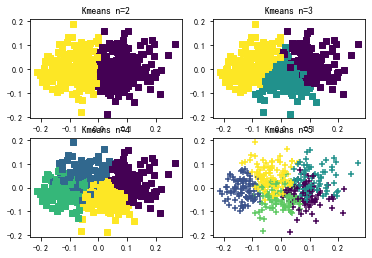

In [80]:
clf  = KMeans(n_clusters=2)
print(clf)
clf.fit(x)
pre = clf.predict(x)
print(pre[:10])

# PCA降维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
newData = pca.fit_transform(x)
print(newData[:4])

L1 = [n[0] for n in newData]
L2 = [n[1] for n in newData]

plt.rc('font',family='SimHei',size=8) # 正常显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
pl = plt.subplot(221)
plt.title('Kmeans n=2')
plt.scatter(L1,L2,c=pre,marker='s')
plt.sca(pl)

clf = KMeans(n_clusters=3)
print(clf)
clf.fit(x)
pre = clf.predict(x)
p2 = plt.subplot(222)
plt.title('Kmeans n=3')
plt.scatter(L1,L2,c=pre,marker='s')
plt.sca(p2)

clf = KMeans(n_clusters=4)
print(clf)
clf.fit(x)
pre = clf.predict(x)
p4 = plt.subplot(223)
plt.title('Kmeans n=4')
plt.scatter(L1,L2,c=pre,marker='s')
plt.sca(p4)

clf  = KMeans(n_clusters=5)
print(clf)
clf.fit(x)
pre = clf.predict(x)
p5 = plt.subplot(224)
plt.title('Kmeans n=5')
plt.scatter(L1,L2,c=pre,marker='+')
plt.sca(p5)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
x = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)
# 计算10颗树的得分
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9333333333333333

In [99]:
# 计算40颗树的得分
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9333333333333333

In [105]:
# KNN鸢尾花预测
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [110]:
iris = load_iris()
# 数据集划分
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=22)
# 特征工程：标准化
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)
# 机器学习(模型训练)
estimator = KNeighborsClassifier(n_neighbors=9)
estimator.fit(x_train, y_train)
# 模型评估
# 方法1：比对真实值和预测值
y_predict = estimator.predict(x_test)
print("预测结果为:\n", y_predict)
print("比对真实值和预测值：\n", y_predict == y_test)
# 方法2：直接计算准确率
score = estimator.score(x_test, y_test)
print("准确率为：\n", score)

预测结果为:
 [0 2 1 2 1 1 1 1 1 0 2 1 2 2 0 2 1 1 1 1 0 2 0 1 2 0 2 2 2 2]
比对真实值和预测值：
 [ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]
准确率为：
 0.9333333333333333
